In [8]:
import pickle as pkl
pklfile = '/home/kartik/Documents/github_projs/housekeep/user-preferences-housekeep/results_18-04-2023_18-03-01.pkl'

with open(pklfile, 'rb') as f:
    results_data = pkl.load(f)

for k, v in results_data['config:'].items(): print(k, v)

hidden_size 512
output_size 1
batch_size 64
max_epochs 30
lr 0.0001
num_layers 2
weight_decay 1e-06
data_path preferences-by-disagreement/personas_tensor_data_18-04-2023_13-24-46.pt
user_conditioned True


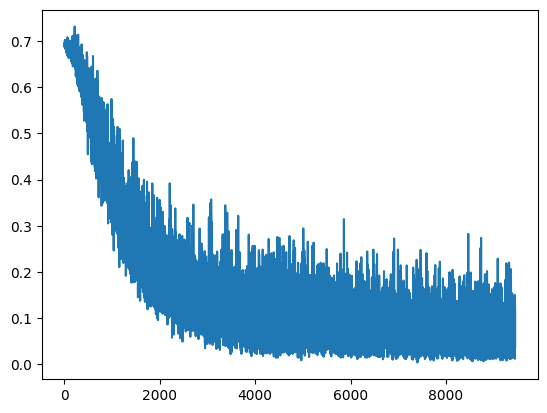

In [9]:
import matplotlib.pyplot as plt

plt.plot(results_data['train_loss'])

# [[ 1048  1036]
#  [10444 10456]]


User conditioning:  True


(array([ 3.,  6.,  4., 13., 20., 18., 19., 10.,  5.,  2.]),
 array([0.04225352, 0.0713615 , 0.10046948, 0.12957746, 0.15868545,
        0.18779343, 0.21690141, 0.24600939, 0.27511737, 0.30422535,
        0.33333333]),
 <BarContainer object of 10 artists>)

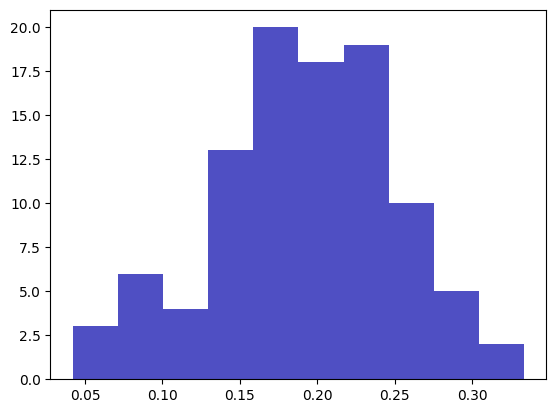

In [7]:
import matplotlib.pyplot as plt
import numpy as np
print('User conditioning: ', results_data['config:']['user_conditioned'])

results_by_user = dict()

for y_gt, y_pred, user_key in zip(results_data['output']['y'], 
                                    results_data['output']['y_pred'], 
                                        results_data['output']['user_labels']):
    user_id = user_key.split('-')[0][1:]

    if user_id not in results_by_user.keys():
        results_by_user[user_id] = np.zeros((2,2))

    # add to confusion matrix
    if y_gt == 1 and y_pred == 1:
        results_by_user[user_id][0,0] += 1
    elif y_gt == 0 and y_pred == 0:
        results_by_user[user_id][1,1] += 1
    elif y_gt == 0 and y_pred == 1:
        results_by_user[user_id][1,0] += 1
    elif y_gt == 1 and y_pred == 0:
        results_by_user[user_id][0,1] += 1

assert len(results_by_user.keys()) == 100

def f1_score(confusion_matrix, average='macro'):
    precision = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[1,0])
    recall = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

f1_by_user = dict()
for user_id in results_by_user.keys():
    f1_by_user[user_id] = f1_score(results_by_user[user_id], average='macro')


plt.hist(x=f1_by_user.values(), color='#0504aa', alpha=0.7)